# Лабораторная работа №6
### Модель ARCH(q)

### Задание №1
##### Сгенерировать ряд длинной 1000 наблюдений в соответствии с уравнением 

$\sigma_t^2 = 0.4 + 0.1\varepsilon_{t-1}^2 + 0.05\varepsilon_{t-2}^2+0.15\varepsilon_{t-3}^2+0.2\varepsilon_{t-4}^2$

Количество наблюдений и коэффициенты

In [25]:
import numpy as np

N = 1000
w = 0.4
coef = np.array([0.2, 0.15, 0.05, 0.1])

Рассмотрим вопрос о стационарности процесса в широком смысле. Т.к. $\varepsilon_t \sim i.i.d.N(0,\sigma^2_t)$, то процесс имеет постоянное(нулевое) математическое ожидание. Также ARCH процесс не автокоррелирован, следовательно, он будет стационарным в широком смысле, если существует дисперсия.


Для существования безусловной диспресии требуется, чтобы все корни характеристического уравнения $1 - \alpha_1z - \alpha_2z^2 - \alpha_3z^3 - \alpha_4z^4 = 0$ лежали вне единичного круга. Поскольку $\forall \alpha_i > 0$, то это эквивалентно тому, что $\sum_{i=1}^4 \alpha_i < 1$. Отсюда делаем вывод, что наш процесс стационарен в широком смысле и для него существует безусловная дисперсия.

Безусловная дисперсия $\sigma^2 = \frac{\omega}{1-\sum_{i=1}^4 \alpha_i}$

In [26]:
uncond_var = w / (1 - sum(coef))
uncond_var

0.8

Смоделируем ряд длинной $N$ исходя из соотношений

$\begin{cases}
   \xi_t \sim i.i.d. N(0,1), 
   \\
   \varepsilon_t = \xi_t\sigma_t,
   \\
   \sigma_t^2 = \omega + \alpha_1\varepsilon_{t-1}^2 + \alpha_2\varepsilon_{t-2}^2 + \alpha_3\varepsilon_{t-3}^2 + \alpha_4\varepsilon_{t-4}^2.
 \end{cases}$

In [27]:
np.random.seed(42)

volatility = np.zeros(N) #вектор дисперсий
error = np.zeros(N+4) #вектор шума
error[:4] = np.sqrt(uncond_var) #инициализация начального шума безусловной дисперсией

for i in range(N):
    volatility[i] = (w + np.dot(error[i:i+4] ** 2, coef))
    error[i+4] = np.random.normal(loc=0, scale=1) * np.sqrt(volatility[i])

### Задание №2
##### Оценить модель ARCH(q) 

In [28]:
from arch import arch_model

model = arch_model(error[4:], mean='Zero', vol='ARCH', p=4, dist='normal')
res = model.fit()
res.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1235.9931718159776
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1235.8064964099433
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1230.1417522849465
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1229.2312553230338
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1228.0546199307726
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1227.7151776560454
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1225.174421067139
Iteration:      8,   Func. Count:     64,   Neg. LLF: 1224.9344087328632
Iteration:      9,   Func. Count:     71,   Neg. LLF: 1224.6965537491435
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1224.6596301945497
Iteration:     11,   Func. Count:     85,   Neg. LLF: 1224.6517477223529
Iteration:     12,   Func. Count:     92,   Neg. LLF: 1224.6513990106741
Iteration:     13,   Func. Count:     99,   Neg. LLF: 1224.6513556148516
Optimization terminated successfully.    (Exit mode 

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1224.65
Distribution:                  Normal   AIC:                           2459.30
Method:            Maximum Likelihood   BIC:                           2483.84
                                        No. Observations:                 1000
Date:                Wed, May 15 2019   Df Residuals:                      995
Time:                        21:43:39   Df Model:                            5
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4010  4.850e-02      8.267  1.371e-16      [  0.306,  0.496]
alpha[1]       0.0774  3.802e-02      2.035  4.183e-02    [2.860e-03,  0.152]
alpha[2]   4.2891e-15  2.730e-02  1.571e-13      1.000 [-5.350e-02,5.350e-02]
alpha[3]       0.1262  3.638e-02      3.469  5.221e-04    [5.491e-02,  0.198]
alpha[4]       0.2562  4.982e-02      5.143  2.701e-07      [  0.159,  0.354]
=============================================================================

Covariance estimator: robust
"""

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
res_volatility = res.conditional_volatility

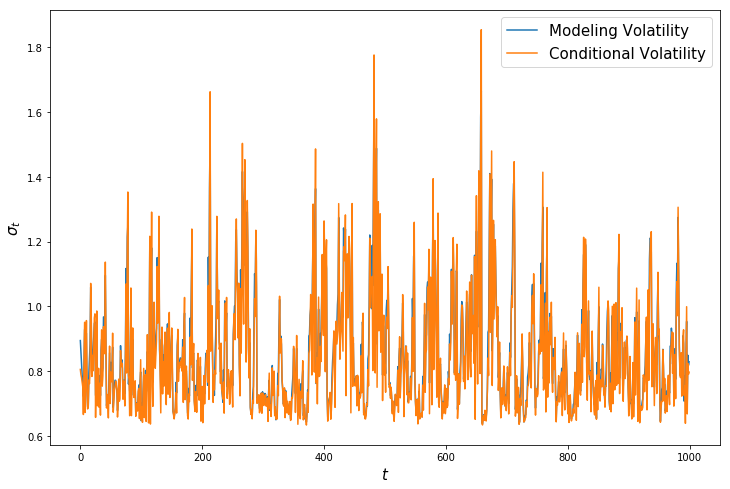

In [31]:
plt.figure(figsize=(12,8))

plt.plot(np.sqrt(volatility), label='Modeling Volatility')
plt.plot(res_volatility, label='Conditional Volatility')
plt.ylabel('$\sigma_t$', fontsize=15)
plt.xlabel('$t$', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Задание №3
##### Проилюстрируем графически ряд ARCH(q)

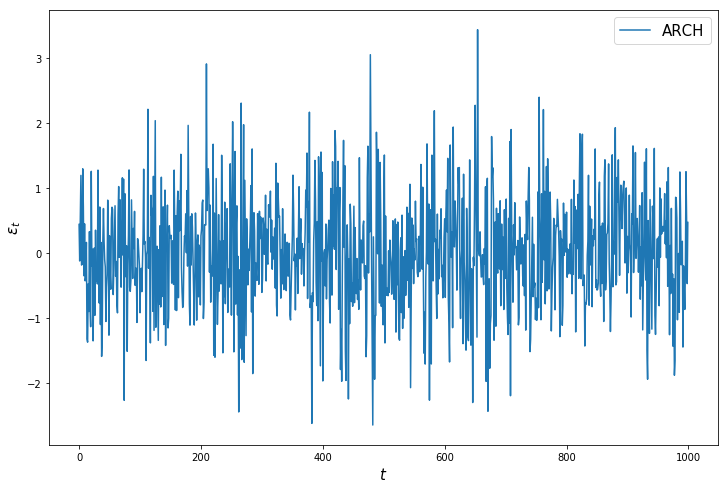

In [32]:
plt.figure(figsize=(12,8))

plt.plot(error[4:], label='ARCH')
plt.ylabel('$\\varepsilon_t$', fontsize=15)
plt.xlabel('$t$', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Задание №4
##### Рассчет описательных статистик ряда

In [33]:
data = error[4:]

***Среднее***

In [34]:
data.mean()

0.012109840329675896

Теоретически равно 0

***Дисперсия***

In [35]:
data.var()

0.7281988678416225

Теоретически равно 0.8

***Автокорреляция***

In [36]:
from statsmodels.tsa.stattools import acf

acf(data, nlags=50)

array([ 1.        ,  0.00181575, -0.00747563,  0.01375762, -0.05177154,
        0.01382561,  0.00234725,  0.00111568, -0.0666766 ,  0.01955573,
        0.02124514,  0.02184438,  0.00648518,  0.01403439, -0.00543721,
       -0.02930861, -0.00837079, -0.03232887,  0.03351201, -0.01329364,
       -0.0563861 , -0.01911443,  0.01048891,  0.03069533, -0.01015942,
       -0.02599093,  0.00740778,  0.0288026 ,  0.01423785,  0.00793426,
        0.00738029,  0.01757388, -0.02084333,  0.00594583, -0.03792103,
       -0.00372166, -0.00308167, -0.00780154, -0.01678789,  0.00935841,
        0.04289733,  0.02018183,  0.03286642, -0.01612593,  0.0159182 ,
        0.00243464,  0.03170133, -0.0022432 ,  0.01038392, -0.00623003,
        0.00371543])

50 лагов достаточно, чтобы убедиться в том, что ряд не автокоррелирован. Это соответствует теории

***Ассиметрия***

In [37]:
from scipy.stats import skew

skew(data)

0.08525254590844411

***Эксцесс***

In [38]:
from scipy.stats import kurtosis

kurtosis(data)

0.4243226314340194